# Cointegration

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Simulate a normal random walk and then generate a cointegrating series.

In [3]:
N = 1000
gamma = 0.7

x = np.cumsum(np.random.normal(size=N))
y = gamma * x + np.random.normal(size=N)

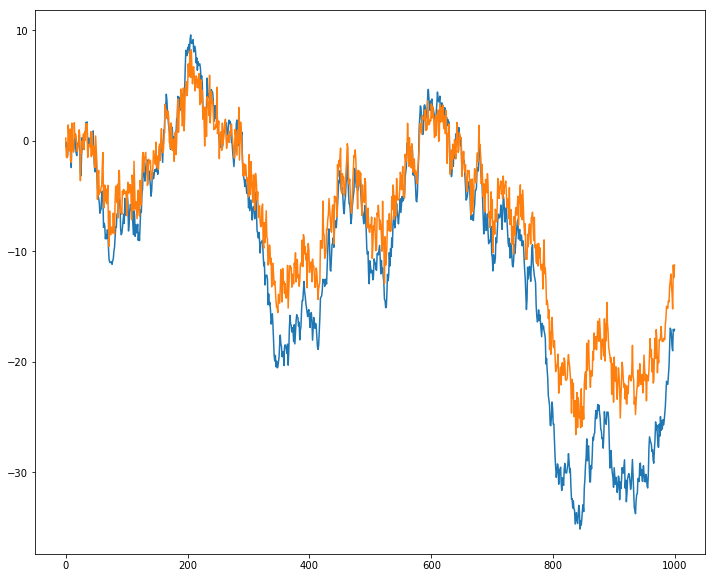

In [6]:
plt.figure(figsize=(12,10))
plt.plot(x)
plt.plot(y)

Are these two time series stationary or non-stationary?  Let's do summary tests to find out. 

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(x)

print('ADF Statistic:  {:.2f}'.format(result[0]))
print('p-value:  {:.2f}'.format(result[1]))

print('')
print('Critical Values:')
print('*' * 80)
for (key, value) in result[4].items():
    print('\t{:}:  {:.3f}'.format(key, value))

ADF Statistic:  -1.44
p-value:  0.57

Critical Values:
********************************************************************************
	1%:  -3.437
	5%:  -2.864
	10%:  -2.568


In [13]:
result = adfuller(y)

print('ADF Statistic:  {:.2f}'.format(result[0]))
print('p-value:  {:.2f}'.format(result[1]))

print('')
print('Critical Values:')
print('*' * 80)
for (key, value) in result[4].items():
    print('\t{:}:  {:.3f}'.format(key, value))

ADF Statistic:  -1.60
p-value:  0.48

Critical Values:
********************************************************************************
	1%:  -3.437
	5%:  -2.864
	10%:  -2.568


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- p-value > 0.05:  Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05:  Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

There must be unknown forces in the real-world that are influencing these series.

Combine the two series linearly and plot.

In [14]:
z = y - gamma * x

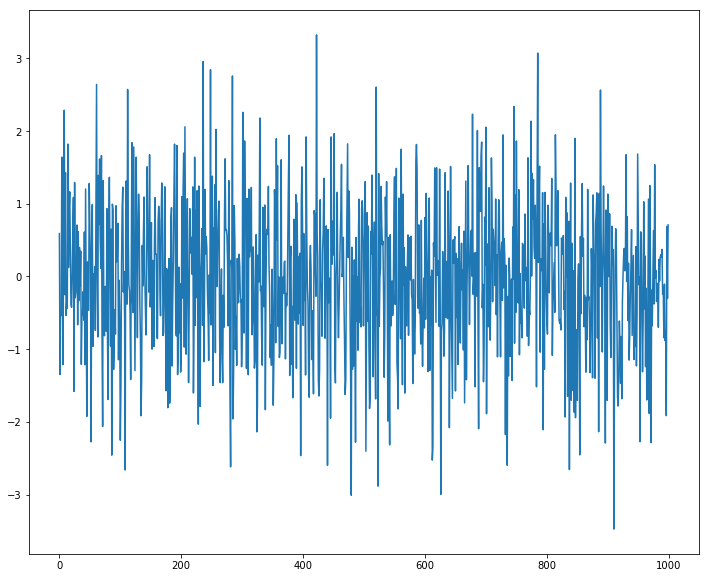

In [15]:
plt.figure(figsize=(12,10))
plt.plot(z)

In [16]:
result = adfuller(z)

print('ADF Statistic:  {:.2f}'.format(result[0]))
print('p-value:  {:.2f}'.format(result[1]))

print('')
print('Critical Values:')
print('*' * 80)
for (key, value) in result[4].items():
    print('\t{:}:  {:.3f}'.format(key, value))

ADF Statistic:  -23.58
p-value:  0.00

Critical Values:
********************************************************************************
	1%:  -3.437
	5%:  -2.864
	10%:  -2.568


The rejection of the unit root is confirmed by the results of the ADF test.

Above I entered a value for gamma but in the real-world this value must be estimated via regression.

In [18]:
import statsmodels.api as sm

model = sm.OLS(y, x)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.112e+05
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:57:46   Log-Likelihood:                -1438.1
No. Observations:                1000   AIC:                             2878.
Df Residuals:                     999   BIC:                             2883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7047      0.002    333.476      0.0

Regression estimates the coefficient at 0.7047 versus my constant of 0.7 above.